In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
import kagglehub

### Load and Preview Dataset

In [4]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)
import os
for i in os.listdir(path):
    print(i)

d:\Personal Projects\Churn Prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 172k/172k [00:00<00:00, 295kB/s]

Extracting files...
Path to dataset files: C:\Users\Shiny\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
WA_Fn-UseC_-Telco-Customer-Churn.csv


In [6]:
df = pd.read_csv("C:/Users/Shiny/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset shape:", df.shape)
display(df.head())
df.info()

Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Convert TotalCharges to numeric (it’s object type with possible blanks)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### EDA

Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


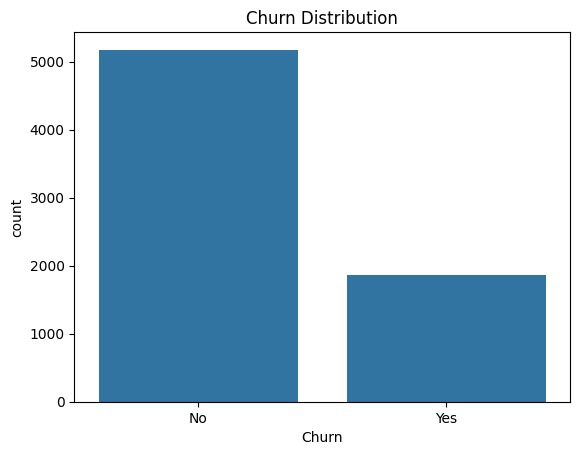

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Distribution of target variable - to see if there is a biasnes
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Basic statistics for numeric columns
df.describe()


In [9]:
# Drop customerID since it’s not useful for modeling
df.drop('customerID', axis=1, inplace=True)

In [10]:
numeric_data=df.select_dtypes(include=np.number)
categorical_data=df.select_dtypes(exclude=np.number)
numeric_data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


C:\Users\Shiny\AppData\Local\Temp\ipykernel_36816\2031801391.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_data[i])
C:\Users\Shiny\AppData\Local\Temp\ipykernel_36816\2031801391.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_data[i])
C:\Users\Shiny\AppData\Local\Temp\ip

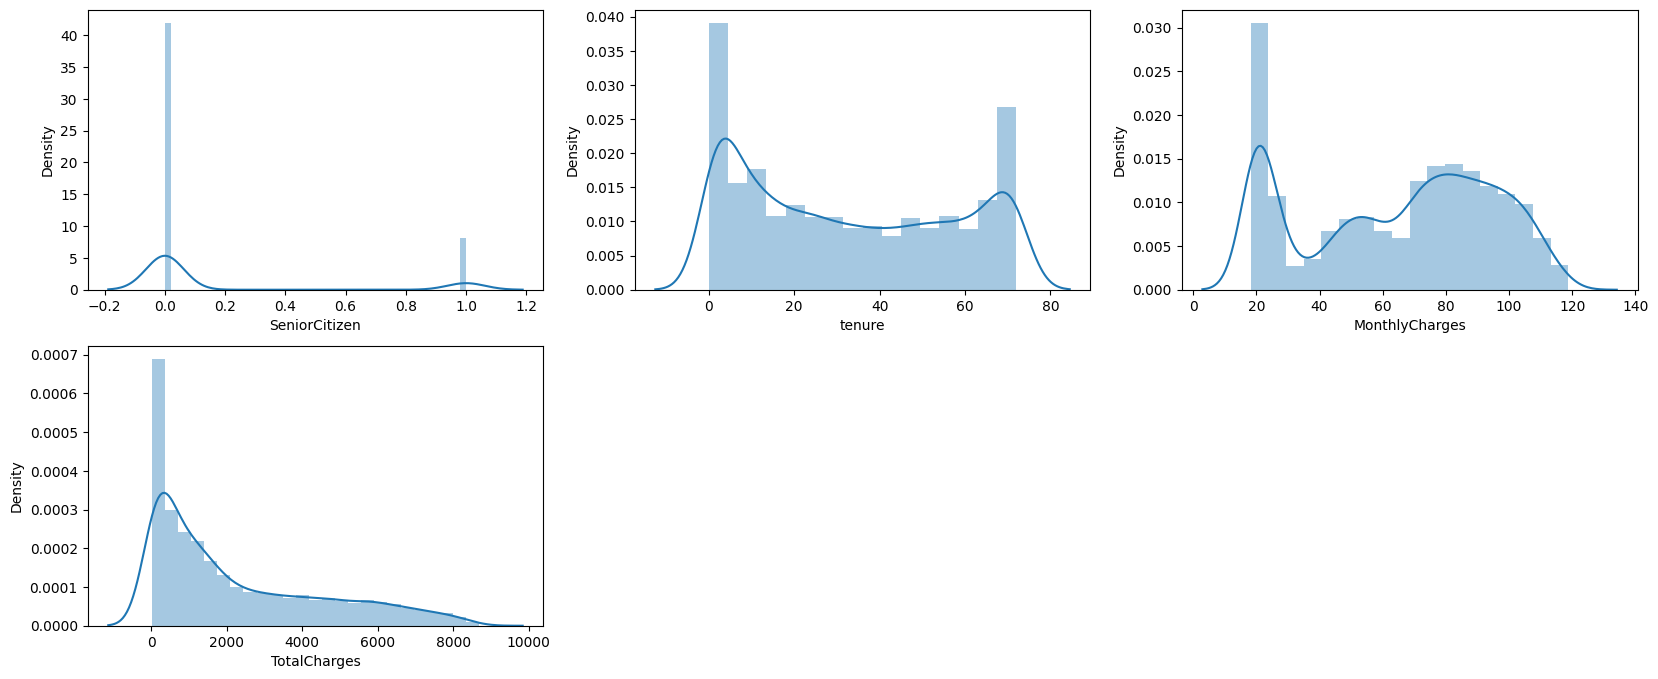

In [11]:
plt.figure(figsize=(20,8))
for e,i in enumerate(numeric_data.columns):
    plt.subplot(2,3,e+1)
    sns.distplot(numeric_data[i])

In [12]:
categorical_data.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


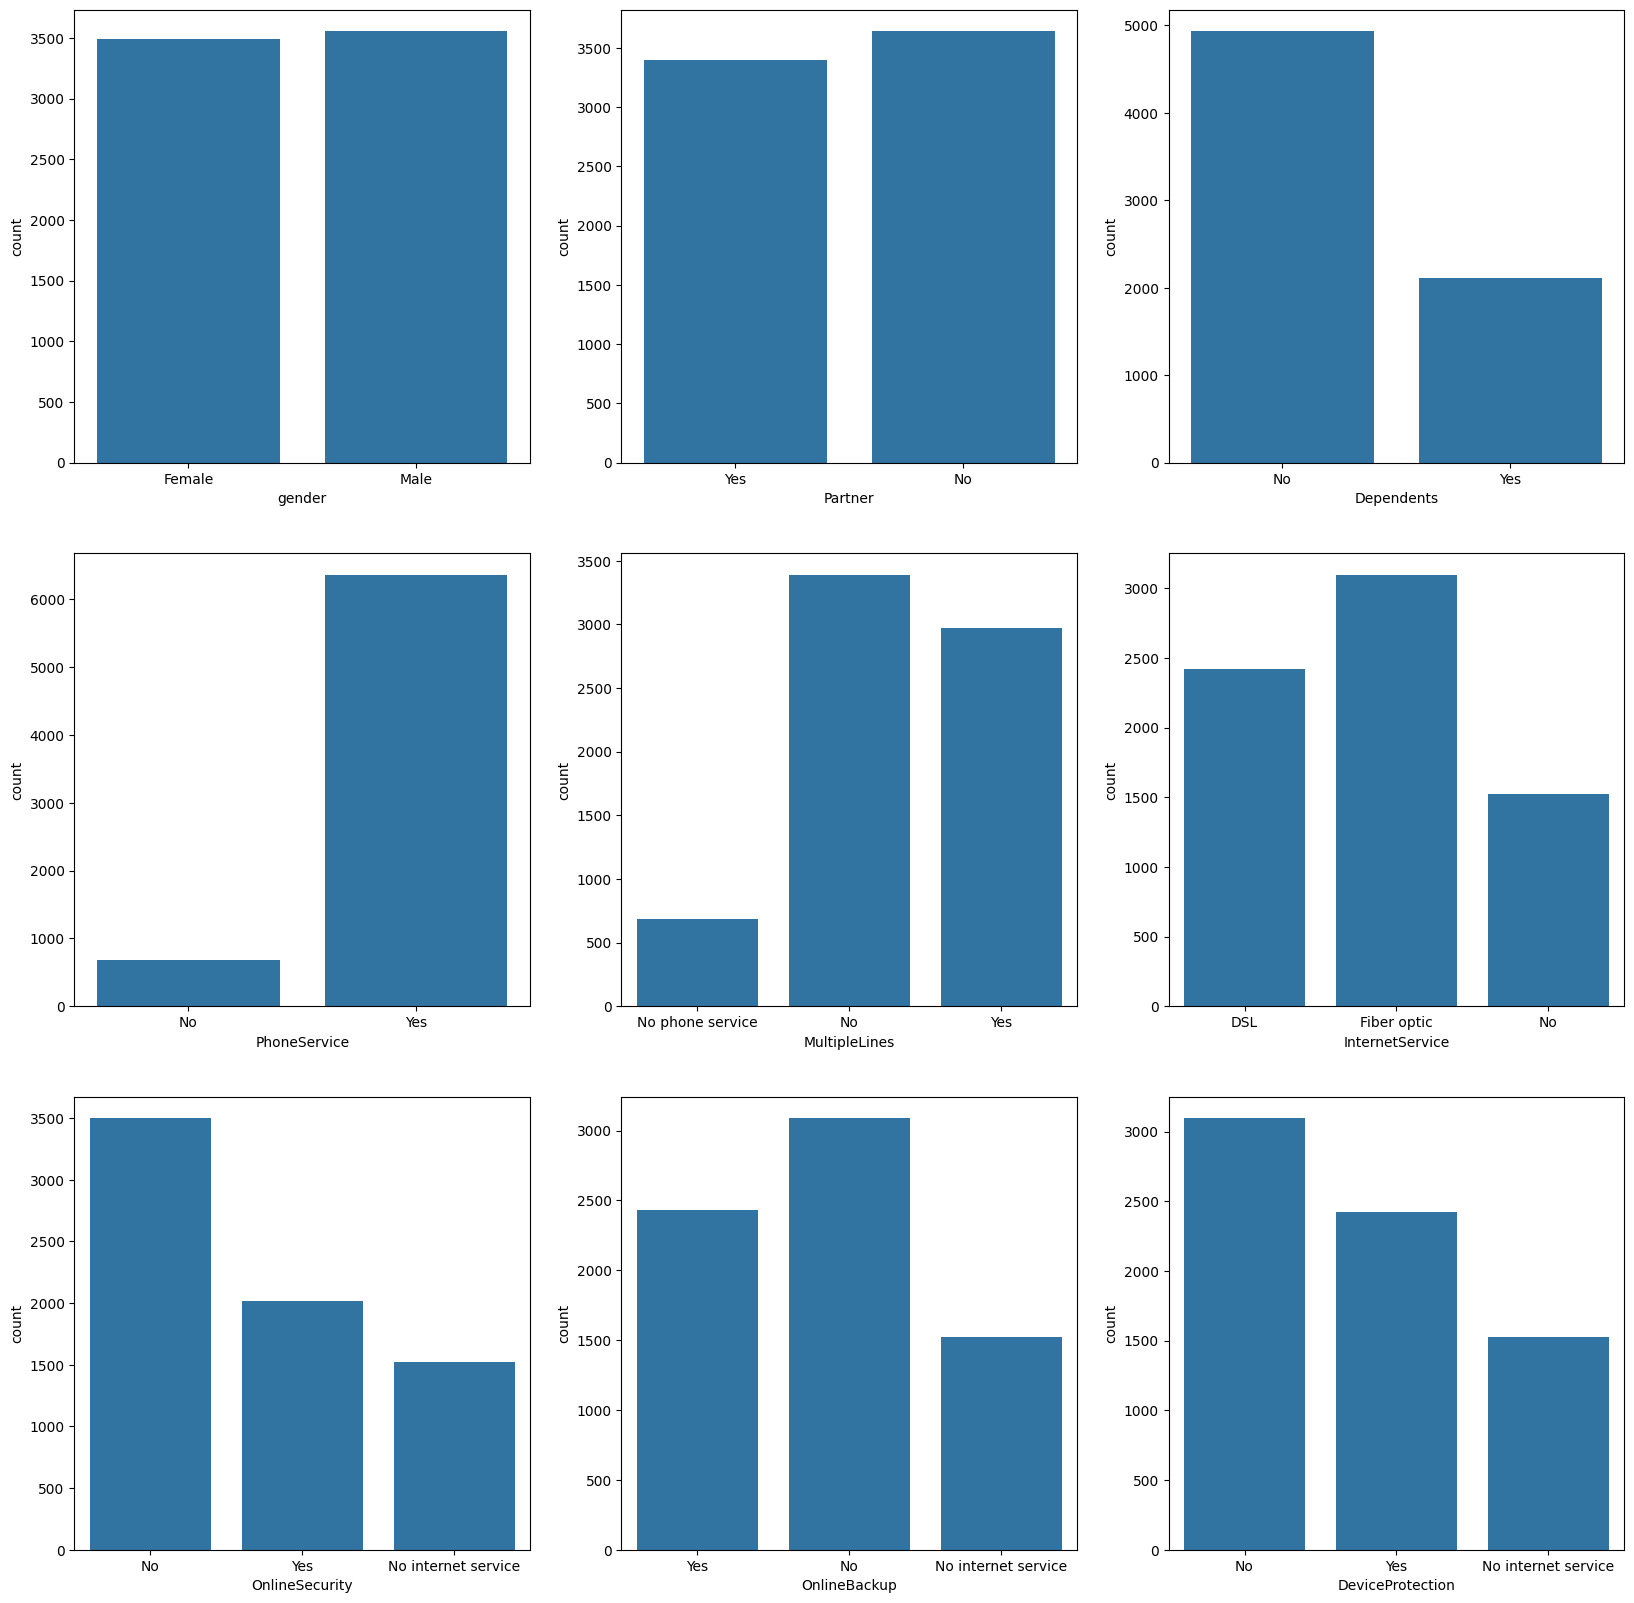

In [13]:
c1=df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection']]
plt.figure(figsize=(20,20))
for e,i in enumerate(c1.columns):
    plt.subplot(3,3,e+1)
    sns.countplot(x=i,data=c1)

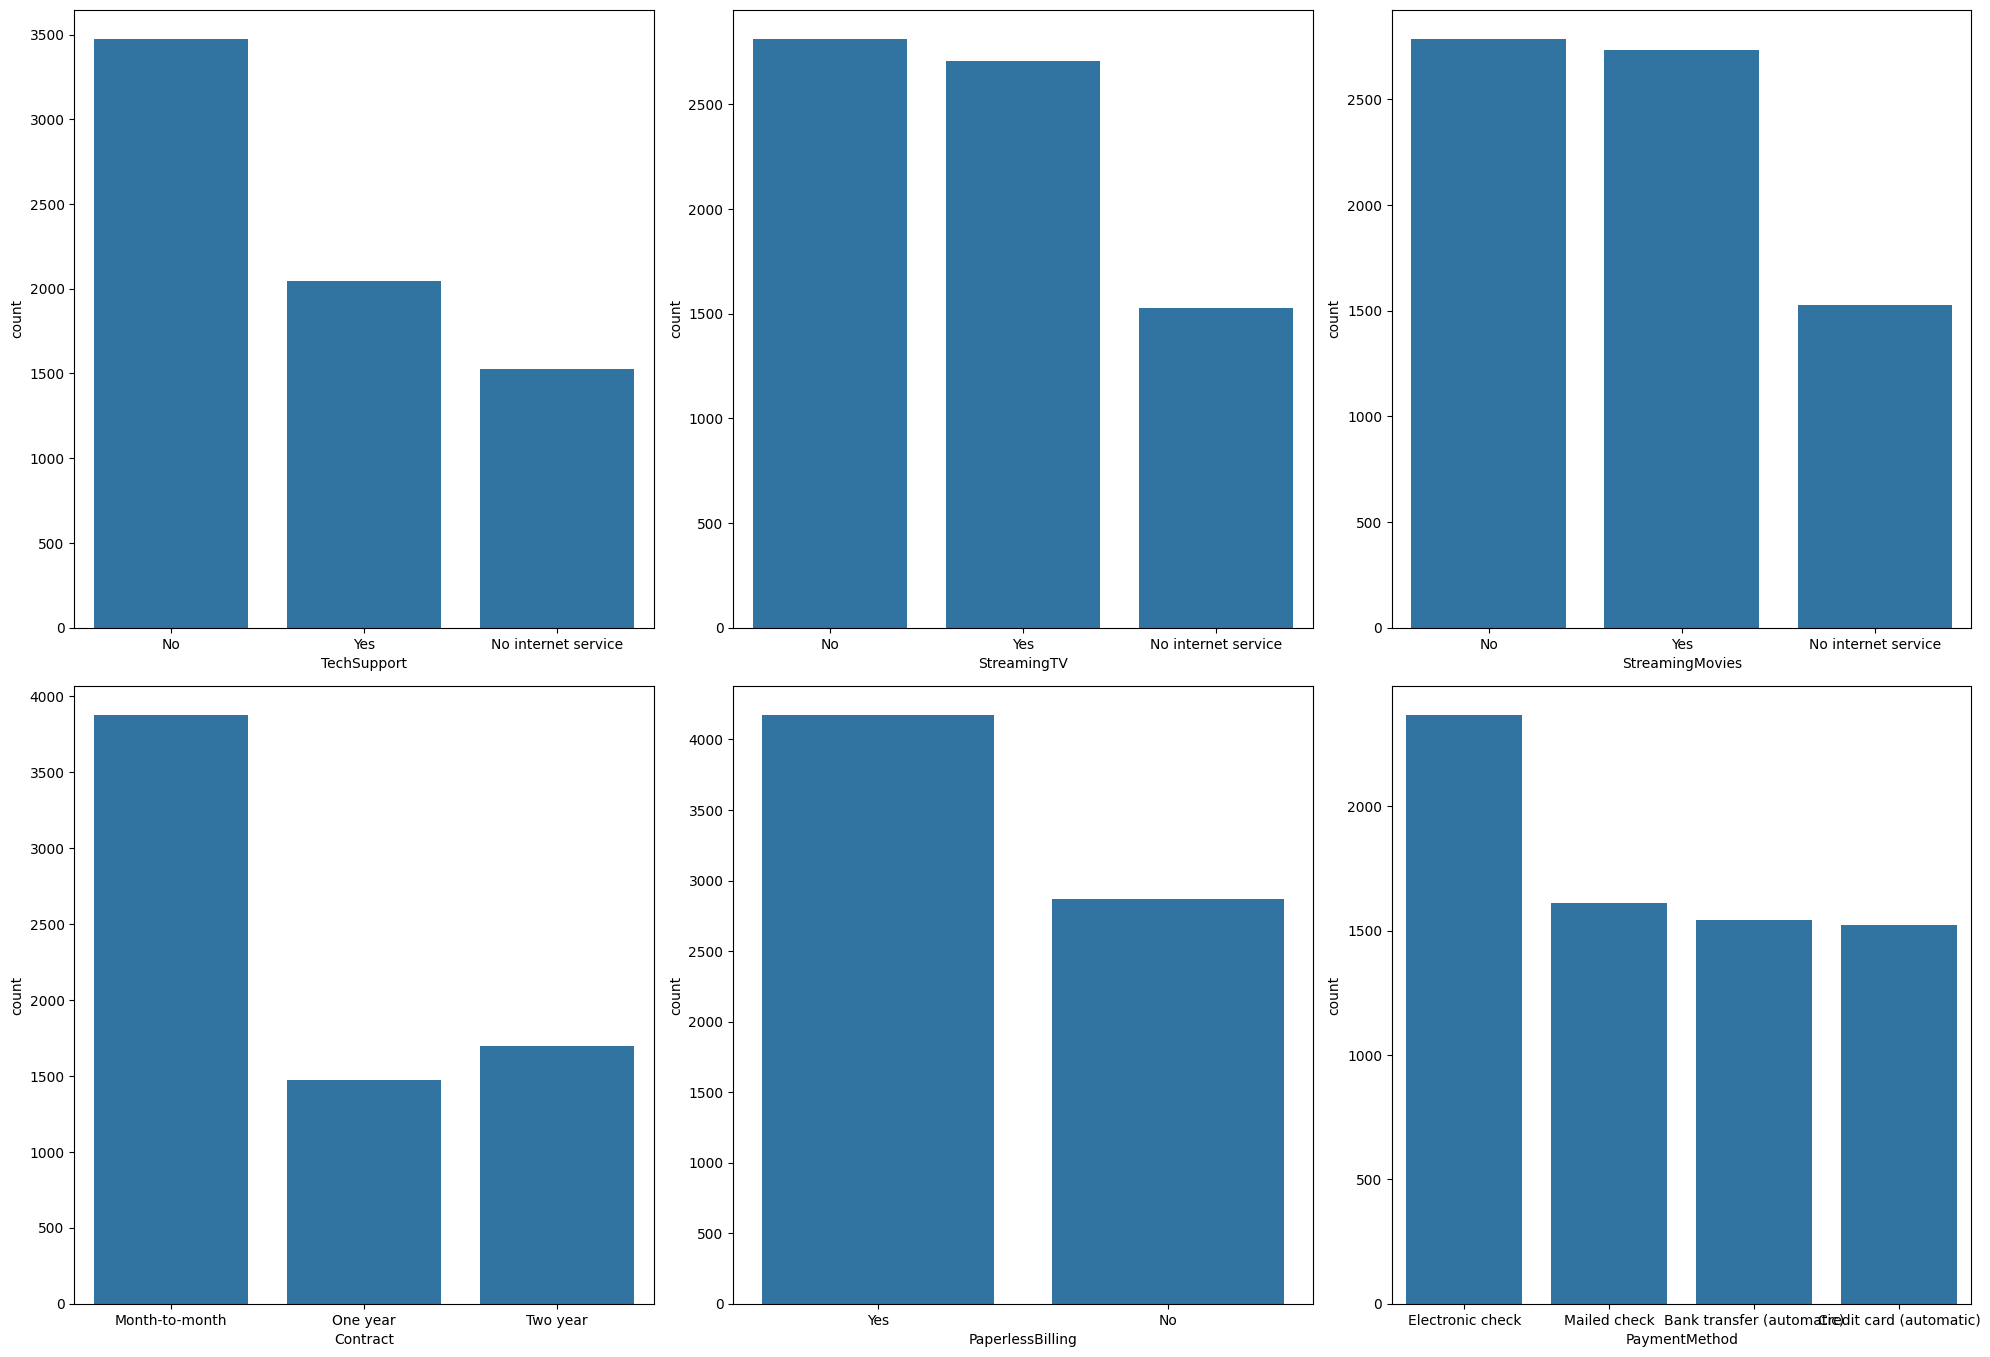

In [14]:
c2=df[['TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
plt.figure(figsize=(20,20))
for e,i in enumerate(c2.columns):
    plt.subplot(3,3,e+1)
    sns.countplot(x=i,data=c2)
    plt.tight_layout()

### Data Cleaning and Transformation

In [15]:
# Fill missing TotalCharges with median
# df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df =df.dropna()
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
le = LabelEncoder()
for col in categorical_data:
    df[col] = le.fit_transform(df[col])

print("After encoding:")
df.head()

After encoding:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [16]:
df.corr().round(2).T

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.10,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.16,0.10,0.32,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.06,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.68,0.00,-0.37,0.25,0.83,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.01,0.25,0.11,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.43,0.45,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.10,0.10,-0.14,0.08,-0.32,-0.18,-0.05
OnlineSecurity,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.18,0.28,0.04,0.06,0.37,-0.16,-0.10,-0.05,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.13,0.12,0.38,-0.20


### Train–Test Split

In [17]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [18]:
y.value_counts(normalize=True)

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [20]:
#There is a biasnes in the target variable. Therefore applying SMOTE + ENN for balancing
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=44)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (4728, 19)
Test set: (1182, 19)


### Random Forest Classifier

In [21]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


In [22]:
print(f"Score For Testing {rf_model.score(X_test,y_test)}")
print(f"Score For Training {rf_model.score(X_train,y_train)}")

Score For Testing 0.9509306260575296
Score For Training 1.0


Random Forest Results
Accuracy: 0.9509306260575296

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       531
           1       0.95      0.97      0.96       651

    accuracy                           0.95      1182
   macro avg       0.95      0.95      0.95      1182
weighted avg       0.95      0.95      0.95      1182



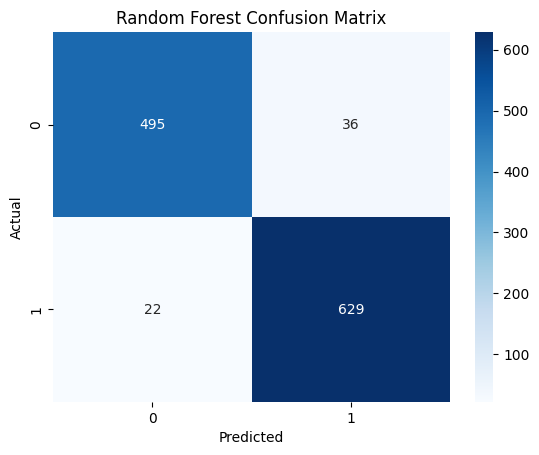

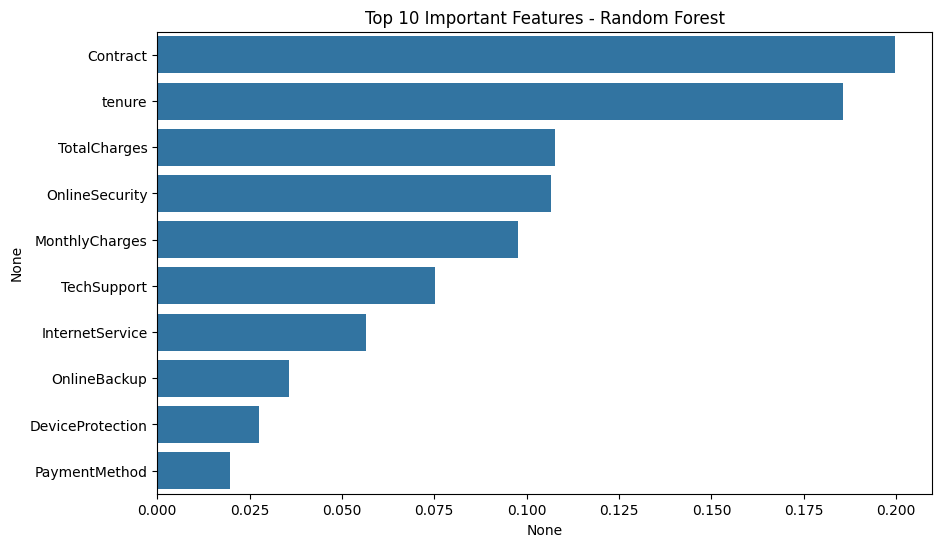

In [23]:
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Important Features - Random Forest")
plt.show()


### XGBoost Model for Comparison

In [24]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=20,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


d:\Personal Projects\Churn Prediction\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:53:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results
Accuracy: 0.9526226734348562

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.95      0.96      0.96       651

    accuracy                           0.95      1182
   macro avg       0.95      0.95      0.95      1182
weighted avg       0.95      0.95      0.95      1182



### Model Comparison

In [25]:
rf_acc = accuracy_score(y_test, y_pred_rf)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"XGBoost Accuracy:      {xgb_acc:.4f}")

if rf_acc > xgb_acc:
    print("Random Forest performed better.")
else:
    print("XGBoost performed better.")


Random Forest Accuracy: 0.9509
XGBoost Accuracy:      0.9526
XGBoost performed better.
